# day 158 and day 159 and day 161

# Multi-Class Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import tensorflow as tf
import os
import zipfile
import requests
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from io import BytesIO

In [ ]:
# downloading the data
!wget 'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip'

--2023-08-25 12:19:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 142.250.103.128, 142.250.159.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   198MB/s    in 2.5s    

2023-08-25 12:19:49 (198 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# extracting the zipfile

zip = zipfile.ZipFile('10_food_classes_all_data.zip')
zip.extractall()
zip.close()

In [ ]:
# get the class_names

class_names = sorted(os.listdir('10_food_classes_all_data/train'))

class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

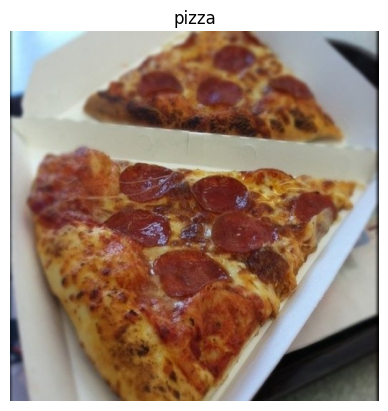

In [ ]:
# view random images of random classes!

def view_random_images_from_random_classes(directory):
  # classes has all classes of food such as icecream,hamburger,chicken_wings etc
  classes = sorted(os.listdir(directory))
  random_class_index = np.random.choice(len(classes))

  images_of_random_class =  os.listdir('10_food_classes_all_data/train' + '/' + classes[random_class_index])

  # extracting a random image from a random class
  random_image_random_class = images_of_random_class[np.random.choice(len(images_of_random_class))]

  # convert the image to machine readable format:
  img = image.imread(directory + '/' + classes[random_class_index] + '/' + random_image_random_class)

  # show the image.
  plt.imshow(img)

  plt.title(classes[random_class_index])

  plt.axis('off')

  plt.show()

view_random_images_from_random_classes(directory = '10_food_classes_all_data/train')

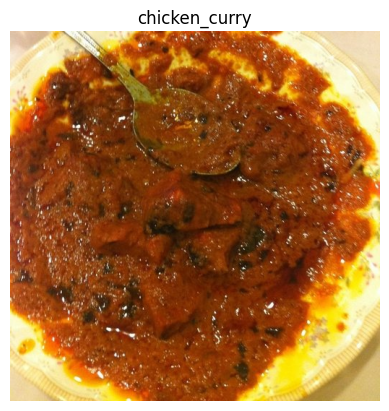

In [ ]:
view_random_images_from_random_classes(directory = '10_food_classes_all_data/train')

# exploration,analysis and freethrows

In [ ]:
train_dir + '/' + classes[random_class_index] + '/' + random_image_random_class

'10_food_classes_all_data/train/hamburger/3880113.jpg'

In [ ]:
# preprocess the data here.


# setting the directories.
train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

# augmenting the training data images
'''augmenting the dataset before fitting it onto a neural network helps avoid the model from overfitting on
training data'''
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# rescaling or normalizing the test data images
test_datagen = ImageDataGenerator(rescale=1./255)

# getting the train and test data from their corresponding directories
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='sparse',
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='sparse',
                                             seed=42)



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
len(train_data) # number of batches in train data

235

In [ ]:
len(test_data) # number of batches in test data

79

In [ ]:
# build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=10,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='valid',
                                 input_shape=(224,224,3),
                                 activation='relu',
                                 name='input_layer'))
model.add(tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10,activation='softmax',name='output_layer'))

# compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


# fit the model
history = model.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=len(test_data)
          )


Epoch 1/5
235/235 [==============================] - 113s 426ms/step - loss: 2.1712 - accuracy: 0.1989 - val_loss: 2.0582 - val_accuracy: 0.2552
Epoch 2/5
235/235 [==============================] - 101s 431ms/step - loss: 1.9690 - accuracy: 0.3060 - val_loss: 1.8846 - val_accuracy: 0.3376
Epoch 3/5
235/235 [==============================] - 100s 425ms/step - loss: 1.8663 - accuracy: 0.3543 - val_loss: 1.8239 - val_accuracy: 0.3756
Epoch 4/5
235/235 [==============================] - 101s 430ms/step - loss: 1.8047 - accuracy: 0.3845 - val_loss: 1.7741 - val_accuracy: 0.3864
Epoch 5/5
235/235 [==============================] - 100s 424ms/step - loss: 1.7511 - accuracy: 0.4025 - val_loss: 1.7421 - val_accuracy: 0.4052


In [ ]:
model.evaluate(test_data)

79/79 [==============================] - 8s 99ms/step - loss: 1.8589 - accuracy: 0.3652


[1.8589277267456055, 0.365200012922287]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Conv2D)        (None, 222, 222, 10)      280       
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

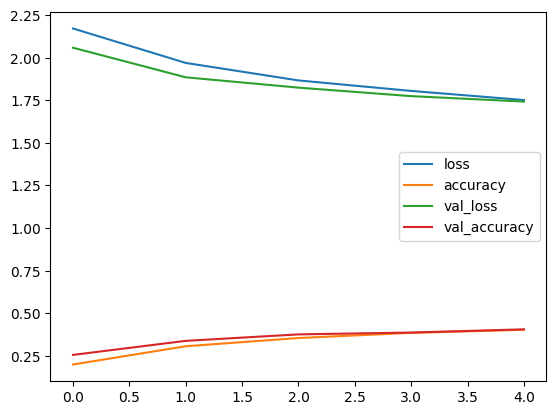

In [ ]:
pd.DataFrame(history.history).plot();

# ways to reduce overfitting:

* **get more data**
* **use data augmentation**: that is to make the training data look more diverse so that it would generalize well on the unseen data.
* **remove some neural layers**: this is to tell the model to have a shallow/broad understanding of the image versus understanding all the nuances.
* **use transfer learning**: it is about making a model use the learning of another model.

# ways to improve the model's performance:

1. increase the number of layers in the network.
2. adjust the learning rate.
3. increase the number of epochs. (10 epochs instead of 5)
4. try chaging or improving the hyperparameters in data augmentation (ImageDataGenerator)

In [ ]:
# preprocess the data

# train and test dir
train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

# data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# creating the training data and testing data
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='sparse',
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='sparse',
                                             seed=42)

In [ ]:
# changes brought to the model2 are:
'''1. 6 conv2d and 3 maxpool2d layers are added
   2. 32 filters in each conv2d
   3. increase epochs to 7'''



# setting the random_seed
tf.random.set_seed(42)

# building model 2
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(filters=32,
                                  kernel_size=(3,3),
                                  strides=(1,1),
                                  padding='valid',
                                  input_shape=(224,224,3),
                                  activation='relu',
                                  name='input_layer'))
model2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='valid'))
model2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='valid'))
model2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3,),activation='relu'))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),padding='valid'))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(10,activation='softmax',name='output_layer'))

# compile the model
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# fit the model
history2 = model2.fit(train_data,
                      epochs=7,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))



Epoch 1/7
235/235 [==============================] - 111s 458ms/step - loss: 2.1321 - accuracy: 0.2237 - val_loss: 2.0227 - val_accuracy: 0.2764
Epoch 2/7
235/235 [==============================] - 105s 448ms/step - loss: 1.9973 - accuracy: 0.2983 - val_loss: 1.9302 - val_accuracy: 0.3136
Epoch 3/7
235/235 [==============================] - 107s 457ms/step - loss: 1.9197 - accuracy: 0.3267 - val_loss: 1.8394 - val_accuracy: 0.3476
Epoch 4/7
235/235 [==============================] - 104s 440ms/step - loss: 1.8576 - accuracy: 0.3599 - val_loss: 1.7664 - val_accuracy: 0.3812
Epoch 5/7
235/235 [==============================] - 111s 470ms/step - loss: 1.7816 - accuracy: 0.3836 - val_loss: 1.6986 - val_accuracy: 0.4136
Epoch 6/7
235/235 [==============================] - 106s 449ms/step - loss: 1.7038 - accuracy: 0.4165 - val_loss: 1.6654 - val_accuracy: 0.4432
Epoch 7/7
235/235 [==============================] - 108s 458ms/step - loss: 1.6385 - accuracy: 0.4439 - val_loss: 1.6443 - val_ac

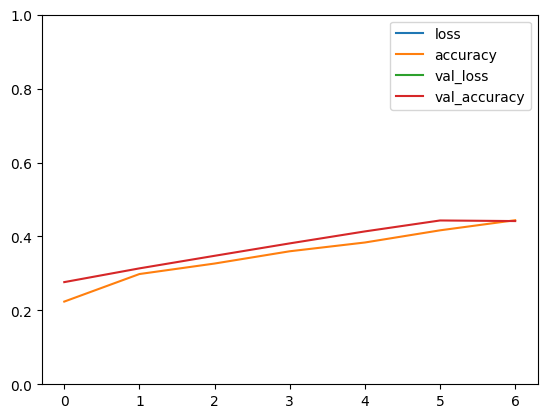

In [ ]:
pd.DataFrame(history2.history).plot()


plt.ylim([0,1])

plt.show()

In [ ]:
# make predictions with the best of our model

# access an image from the internet using its url
def preprocessed_custom_image(url):
  image = load_img(BytesIO(requests.get(image_url).content),target_size=(224,224))

  image_numbers = tf.constant(img_to_array(image))

  rescaling = image_numbers/255.

  expand = tf.expand_dims(rescaling,axis=0)

  return expand

1/1 [==============================] - 0s 34ms/step


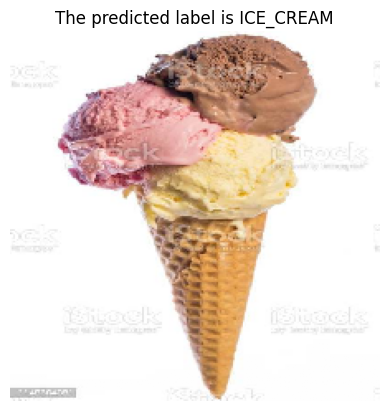

In [ ]:
# making predictions on the custom image

def predict_and_label(image_url,class_directory):

  # getting the image from the internet
  custom_image = preprocessed_custom_image(image_url)


  # prediction and prediction_label
  prediction = model2.predict(custom_image)
  class_names = sorted(os.listdir(class_directory))
  predicted_label = class_names[np.argmax(prediction)]

  # show image,put the predicted label as title

  plt.imshow(tf.squeeze(custom_image))

  plt.title('The predicted label is %s'%(str.upper(predicted_label)))

  plt.axis('off')

  plt.show()









image_url = 'https://media.istockphoto.com/id/1148364081/photo/front-view-of-real-edible-ice-cream-cone-with-3-different-scoops-of-ice-cream-isolated-on.jpg?s=612x612&w=is&k=20&c=2NAi1Ko2Lk9cgX_tKoGSLQgPM41zBwJ1VSQSH1_d87Q='


predict_and_label(image_url=image_url,class_directory='10_food_classes_all_data/train')

1/1 [==============================] - 0s 18ms/step


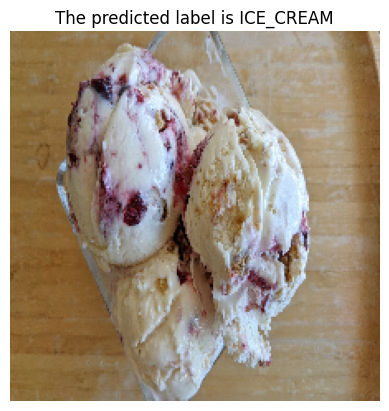

In [ ]:
image_url = 'https://images.squarespace-cdn.com/content/v1/59b9b44d37c581d37338f618/1624304919975-LEJJ4DUB9B8I0CW6A6A6/Michiberry+Pie.jpeg'

predict_and_label(image_url=image_url,class_directory='10_food_classes_all_data/train')

1/1 [==============================] - 0s 22ms/step


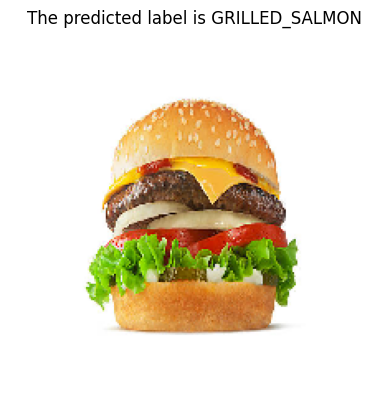

In [ ]:
image_url = 'https://media.istockphoto.com/id/520410807/photo/cheeseburger.jpg?s=612x612&w=0&k=20&c=fG_OrCzR5HkJGI8RXBk76NwxxTasMb1qpTVlEM0oyg4='
predict_and_label(image_url=image_url,class_directory='10_food_classes_all_data/train')

# conclusion:

* our model performs poorly with an accuracy rate of ~44% and classifies objects incorrectly.

# exploration,analysis and freethrows

In [ ]:
# exploration,analysis and freethrows

custom_image = preprocessed_custom_image(image_url)

model2.predict(custom_image)

1/1 [==============================] - 0s 21ms/step


array([[0.01479139, 0.01799458, 0.00982717, 0.0144341 , 0.01440163,
        0.6062129 , 0.00661256, 0.00410533, 0.01090762, 0.30071273]],
      dtype=float32)

In [ ]:
sorted(os.listdir('10_food_classes_all_data/train'))

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
class_names[np.argmax(model2.predict(custom_image))]

1/1 [==============================] - 0s 89ms/step


'pizza'

In [ ]:
str.upper(class_names[6])

'PIZZA'

# saving and loading the model

* we can save the model and load it in any other system to have it work for needed parties.

In [ ]:
model2.evaluate(test_data)

79/79 [==============================] - 10s 128ms/step - loss: 1.6443 - accuracy: 0.4416


[1.6442722082138062, 0.4415999948978424]

In [ ]:
# saving the model
# the format is model.save('name_of_the_model_that_you_want_to_give')
model2.save('saved_model2')

# loading the model
# the format is tf.keras.models.load_model('name_of_the_model')
loaded_model = tf.keras.models.load_model('saved_model2')

loaded_model.evaluate(test_data)

79/79 [==============================] - 7s 88ms/step - loss: 1.6443 - accuracy: 0.4416


[1.644271731376648, 0.4415999948978424]